In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [13]:
age=np.array([16,24,31,29,40,33,18,15,19,21,29,31,24,20,34,22,32,36,37])
job=np.array([0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1])

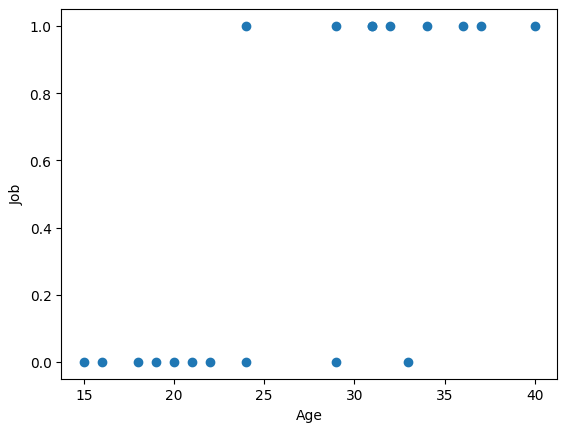

In [14]:
plt.scatter(age, job)
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

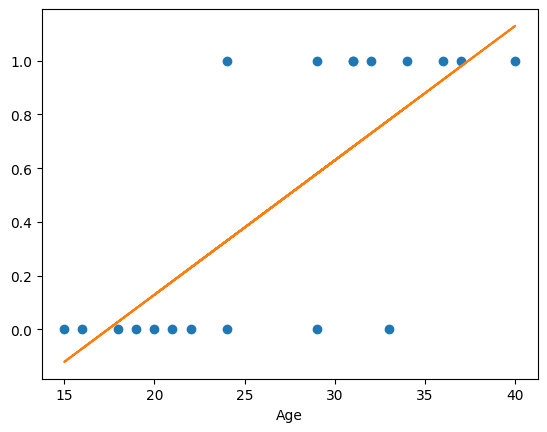

In [15]:
m,c = np.polyfit(age, job, 1)
plt.xlabel('Age')
plt.plot(age, job, 'o')
plt.plot(age, m*age+c)

In [19]:
data = pd.DataFrame(pd.read_csv('Bank.csv')) #load the Bank dataset
data

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...
41183,59,222,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,-3.4,92.431,-26.9,0.742,5017.5,0


In [ ]:
data.isnull().sum() #check for missing values

age               0
duration          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [24]:
#select data for dependent variable and independent variable
x = data.iloc[:, :7] 
y = data.iloc[:, 7]

In [28]:
print('x shape: ', x.shape)
print('y shape: ',y.shape)

x shape:  (41188, 7)
y shape:  (41188,)


In [29]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [30]:
#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
#check how many data points are in the training and testing data
len(x_train), len(x_test), len(y_train), len(y_test)

(32950, 8238, 32950, 8238)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
#creating and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
model.score(x_train, y_train)

0.9048254931714719